In [1]:
import numpy as np
import scipy.io as sio
from scipy.sparse.csgraph import shortest_path
from scipy.spatial.distance import cdist
import scipy.sparse.linalg as ssl
from random import sample
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage, AnnotationBbox)

In [2]:
# Load data
data = sio.loadmat('isomap.mat')['images']
n,m = data.shape

# Calculate distances between every pair of points
A = cdist(data.T, data.T)

# Choose epsilon threshold and set all values greater than epsilon equal to 0
eps = 11
for i,j in zip(np.where(A > eps)[0], np.where(A > eps)[1]):
    A[i,j] = 0

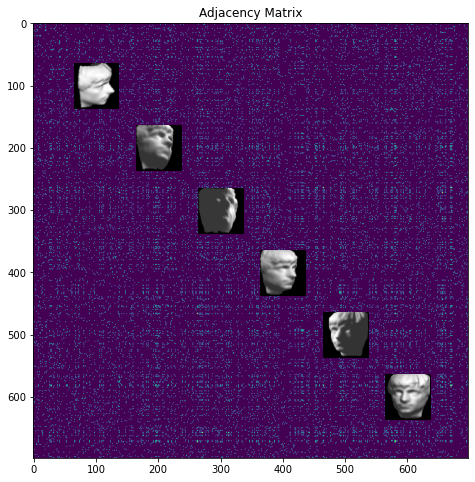

In [3]:
# Plot adjacency matrix with example images along the diagonal
fig, ax = plt.subplots()
ax.imshow(A)
plt.title('Adjacency Matrix')
fig.set_size_inches(8,8)

# Define positions to annotate
for pos in np.arange(100,700,100):
    xy = (pos,pos)
    imagebox = OffsetImage(data[:,pos].reshape((64,64), order='F'), zoom=0.7, cmap='gray')
    imagebox.image.axes = ax
    ab = AnnotationBbox(imagebox, xy, xycoords='data', pad=0)
    ax.add_artist(ab)
    
plt.savefig('Adjacency Matrix')

In [4]:
# Compute pairwise shortest distance matrix D
D = shortest_path(A)
# Compute centering matrix H
H = np.eye(m) - 1/m * np.dot(np.ones((m,1)), np.ones((1,m)))
# Compute C
C = -0.5 * H @ np.power(D,2) @ H
lambd, w = ssl.eigs(C, k=2)
lambd = lambd.real
w = w.real

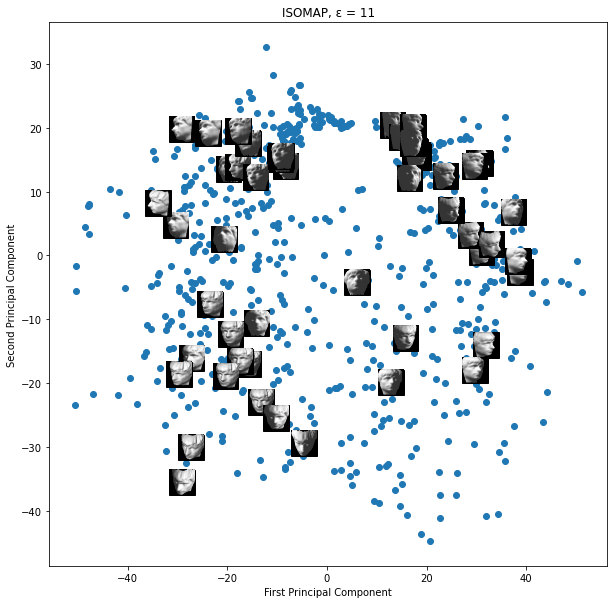

In [5]:
# Plot first two principal components
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
dim1 = w[:,0]*np.sqrt(lambd[0])
dim2 = w[:,1]*np.sqrt(lambd[1])
ax.scatter(dim1,dim2)
plt.title('ISOMAP, \u03B5 = {}'.format(eps))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Annotate plot with a random sampling of images
n_im = 50
for i in sample(range(698), n_im):
    xy = (dim1[i],dim2[i])
    imagebox = OffsetImage(data[:,i].reshape((64,64), order='F'), zoom=0.4, cmap='gray')
    imagebox.image.axes = ax
    ab = AnnotationBbox(imagebox, xy, xycoords='data', pad=0)
    ax.add_artist(ab)

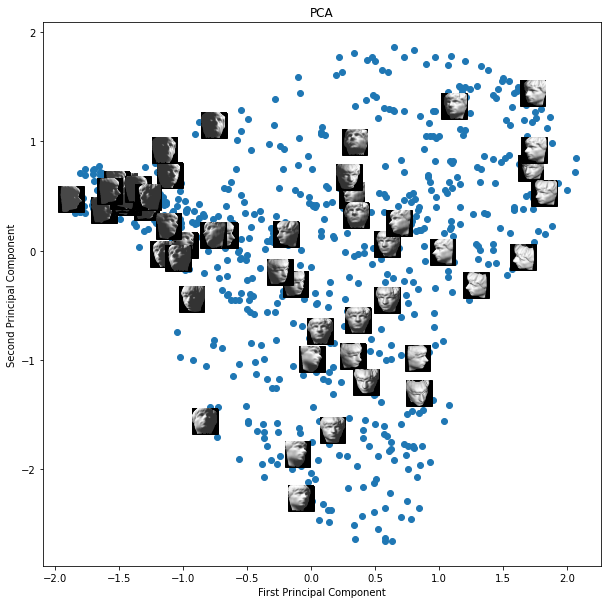

In [6]:
# Perform linear PCA for comparison
mu = np.mean(data, axis=1)
xc = data - mu[:, None]
C = np.dot(xc, xc.T)/m

lambd, w = ssl.eigs(C, k=2)
lambd = lambd.real
w = w.real

dim1 = np.dot(w[:,0].T,xc)/np.sqrt(lambd[0])
dim2 = np.dot(w[:,1].T,xc)/np.sqrt(lambd[1])

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.scatter(dim1,dim2)
plt.title('PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Annotate plot with a random sampling of images
n_im = 50
for i in sample(range(698), n_im):
    xy = (dim1[i],dim2[i])
    imagebox = OffsetImage(data[:,i].reshape((64,64), order='F'), zoom=0.4, cmap='gray')
    imagebox.image.axes = ax
    ab = AnnotationBbox(imagebox, xy, xycoords='data', pad=0)
    ax.add_artist(ab)